# NLP Project Round 1

### Importing The Libraries

In [21]:
import urllib.request, urllib.parse, urllib.error
import ssl
import json
import nltk
import re
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

### Function for Plotting the Graph

In [22]:
def plot(X,Y,X_label,Y_label,title):
    plt.bar(X, Y, tick_label = X, width = 0.8, color = ['blue', 'green'])
    plt.xlabel(X_label)
    plt.ylabel(Y_label)
    plt.title(title)
    plt.show()

In [23]:
def plot_relationship(freq_dist):
    
    # freq_dist is the frequency distribution of each of word
    # word_length is a list that will contain all the word length and the frequency of that corresponding word
    word_length = {}
    
    for i in freq_dist.keys():
        if len(i) not in word_length.keys():
            word_length[len(i)] = freq_dist[i] #adding a new word length and its frequency in the word_length list
        else:
            word_length[len(i)] += freq_dist[i] #increasing the frequency of already existing word length

    #X will contain all the length of the words
    
    X = []
    
    #Y will contain the corresponding frequency
    Y = []

    for i in word_length.keys():
        X.append(i)
        
    # Sorting the word length
    X.sort()

    for i in X:
        Y.append(word_length[i])

    #Plotting a bar graph for recorded data
    X_label = 'WORD LENGTH'
    Y_label = 'FREQUENCY'
    title = 'RELATIONSHIP BETWEEN WORD LENGTH AND FREQUENCY'
    plot(X,Y,X_label,Y_label,title)

### Extracting First text

In [24]:
book1 = 'http://www.gutenberg.org/files/1342/1342-0.txt'
print('Extracting ',book1)
uh1 = urllib.request.urlopen(book1)
data1 = uh1.read().decode('utf8')

Extracting  http://www.gutenberg.org/files/1342/1342-0.txt


### Extracting Second text

In [25]:
book2 = 'http://www.gutenberg.org/files/829/829-0.txt'
print('Extracting ',book2)
uh2 = urllib.request.urlopen(book2)
data2 = uh2.read().decode('utf8')

Extracting  http://www.gutenberg.org/files/829/829-0.txt


### Preprocessing of the Books

In [26]:
# pre-processing the text of Book-1
data1 = data1.lower()
data1 = re.sub('^Section [1-9].', '', data1)
data1 = re.sub(r'==.*?==+', '', data1)
data1 = re.sub(r'CHAPTER \d+', '', data1)
data1 = re.sub('[\(\[].*?[\)\]]', '', data1)
data1 = re.sub(r'[^a-zA-Z0-9\s]', '', data1)
data1 = data1.replace('\n', '')

In [27]:
# pre-processing the text of Book-2
data2 = data2.lower()
data2 = re.sub('^Section [1-9].', '', data2)
data2 = re.sub(r'==.*?==+', '', data2)
data2 = re.sub(r'CHAPTER \d+', '', data2)
data2 = re.sub('[\(\[].*?[\)\]]', '', data2)
data2 = re.sub(r'[^a-zA-Z0-9\s]', '', data2)
data2 = data2.replace('\n', '')

### Tokenization

In [28]:
# Tokenizing the text of the books
token1 = nltk.word_tokenize(data1)
token2 = nltk.word_tokenize(data2)

In [29]:
# Frequency Distribution for token 1
fdist1 = FreqDist(token1)
print(fdist1.most_common(20))

[('the', 4511), ('to', 4207), ('of', 3722), ('and', 3596), ('her', 2215), ('i', 2050), ('a', 1994), ('in', 1921), ('was', 1845), ('she', 1704), ('that', 1583), ('not', 1568), ('it', 1534), ('you', 1421), ('he', 1333), ('his', 1268), ('be', 1254), ('as', 1192), ('had', 1175), ('with', 1097)]


In [30]:
# frequency Distribution for token 2
fdist2 = FreqDist(token2)
print(fdist2.most_common(20))

[('the', 6151), ('of', 3965), ('and', 3738), ('to', 3532), ('i', 2864), ('a', 2527), ('in', 2068), ('my', 1608), ('that', 1310), ('was', 1274), ('with', 1003), ('me', 1003), ('as', 989), ('his', 920), ('for', 897), ('he', 870), ('which', 858), ('by', 848), ('it', 841), ('had', 726)]


In [31]:
fig = plt.figure(figsize=(40, 30))

<Figure size 2880x2160 with 0 Axes>

### Plotting the Line Graph and Bar Graph

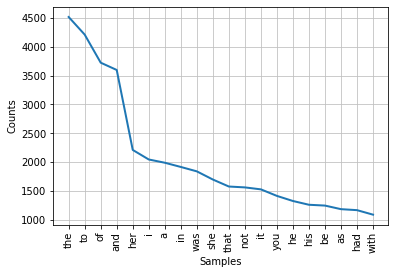

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
fdist1.plot(20)

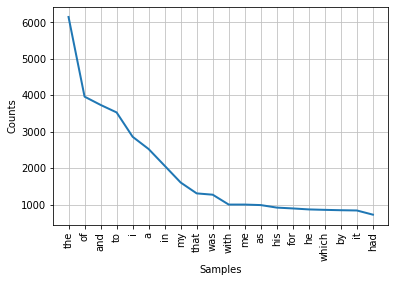

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
fdist2.plot(20)

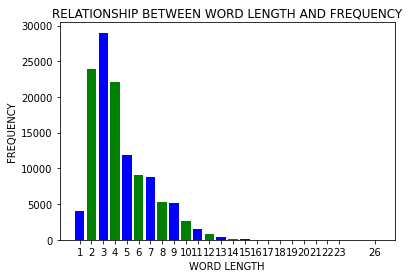

In [34]:
plot_relationship(fdist1)

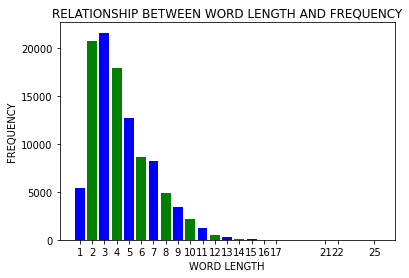

In [35]:
plot_relationship(fdist2)